### CSE_221710302039_M.ABHISHEK NAIDU

### context (or) problem statment:

```Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.```

```He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.```

```Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.```

```In this problem you do not have to predict actual price but a price range indicating how high the price is```

#### Datasets and Inputs:

Given a dataset containing various attributes of mobile phone features. The dataset that i am working is downloaded from kaggle site from the reference given by the dyanahitha team: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

##### In this data:

- id:ID
- battery_power:Total energy a battery can store in one time measured in mAh
- blue:Has bluetooth or not
- clock_speed:speed at which microprocessor executes instructions
- dual_sim:Has dual sim support or not
- fc:Front Camera mega pixels
- four_g:Has 4G or not
- int_memory:Internal Memory in Gigabytes
- m_dep:Mobile Depth in cm
- mobile_wt:Weight of mobile phone
- n_cores:Number of cores of processor
- pc:Primary Camera mega pixels
- px_height:Pixel Resolution Height
- px_width:Pixel Resolution Width
- ram:Random Access Memory in Megabytes
- sc_h:Screen Height of mobile in cm
- sc_w:Screen Width of mobile in cm
- talk_time:longest time that a single battery charge will - last when you are
- three_g:Has 3G or not
- touch_screen:Has touch screen or not
- wifi:Has wifi or not

#### Uses:

- This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
- Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

#### 1. LOAD required packages

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#versions of packages
import numpy
import matplotlib
print('numpy:',numpy.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
print('matplotlib:',matplotlib.__version__)

numpy: 1.15.4
pandas: 0.23.4
seaborn: 0.9.0
matplotlib: 3.0.2


In [4]:
df_train=pd.read_csv('https://raw.githubusercontent.com/abhi230699/AI-ML_project/master/train%5B1%5D.csv')

In [5]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#### Observations:-
    1.Max Battery power is 2000mah

    2.75% of the phones have Dual sim avilability

    3.50% of the mobile phones has 32gb of memory

    4.most of the mobile phones are screen touch enabled and supports 3g , 4g and are wifi enabled

In [7]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df_train.info() #there are no null values in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [11]:
df_train.select_dtypes(exclude=['int', 'float']).columns #cathegorical

Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
df_train.select_dtypes(include=['int', 'float']).columns #numerical

Index(['clock_speed', 'm_dep'], dtype='object')

In [13]:
df_train.groupby('price_range').size() #target variable size

price_range
0    500
1    500
2    500
3    500
dtype: int64

#### 2. Visualization

In [14]:
df_train.corr() #correlation

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


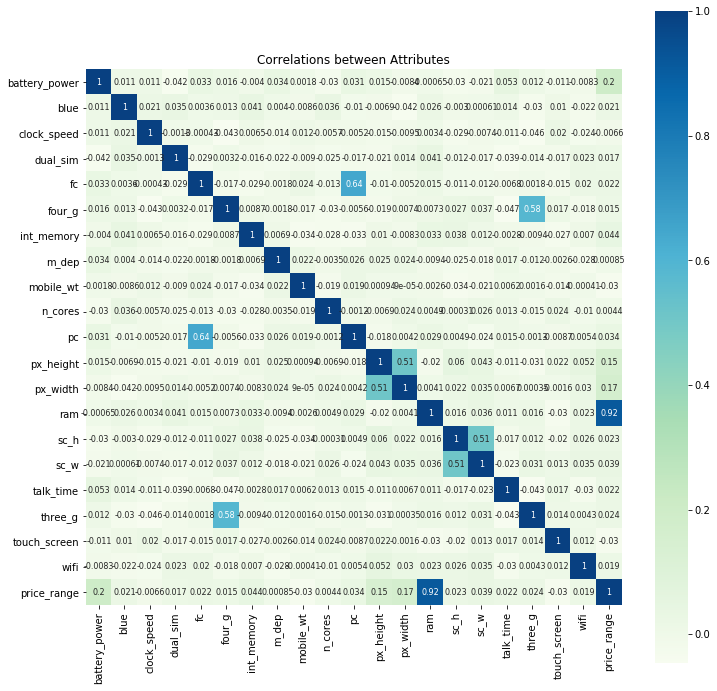

In [15]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(df_train.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

#### We can see these attributes having relationship with each other:

- Price range vs. ram: high positive correlation
- fc vs. pc: positive correlation
- four_g vs. three_g: positive correlation
- pc_height vs. pc_width: positive correlation

#### We see from the heatmap:

- the most influential variable is ram
- most of the variables have very little correlation to price range
- primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.
- having 3G and 4G is somewhat correlated
- there is no highly correlated inputs in our dataset, so there is no multicollinearity problem

#### How does ram is affected by price :

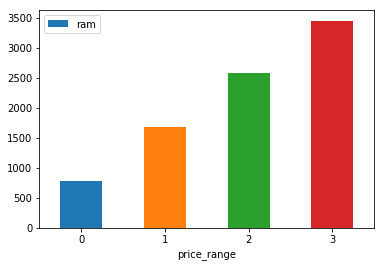

In [16]:
df_train.groupby('price_range').mean()['ram'].plot(kind = 'bar', legend = True).tick_params(axis = 'x', labelrotation = 360)

###### Here,we can see :

- The price_range 3 having more RAM
- The price_range 0 having low RAM

#### Internal Memory vs Price Range

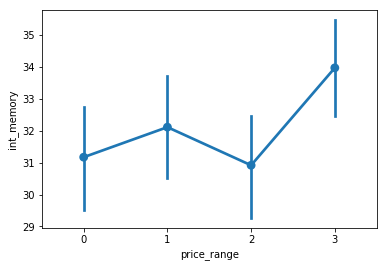

In [17]:
sns.pointplot(y="int_memory", x="price_range", data=df_train)

##### In the pointplot:

- If price_range is 3 then internal memory is above 35GB
- If price_range is 1 then internal memory is nearly 32GB

##### Bluetooth,Wifi vs price

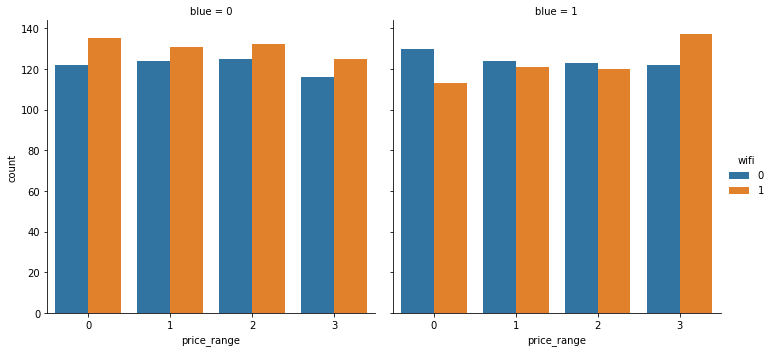

In [18]:
sns.catplot('price_range', col='blue',hue = 'wifi',data = df_train,  kind = 'count', col_wrap=2)

##### In the catplot we observe that:

- Bluetooth and Wifi seem to not have a significant affect to phone price since they have similar distribution in every price range.

#### percentage(%) of Phones which support 3G

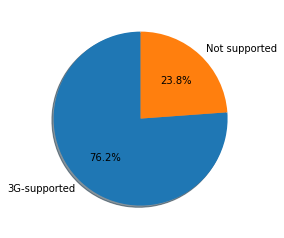

In [19]:
labels = ["3G-supported",'Not supported']
values=df_train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

###### Here,in the piechart we observe:

- 76.2% phones support 3-G Network
- 23.8% phones does not support 3-G Network

###### percentage(%) of Phones which support 4G

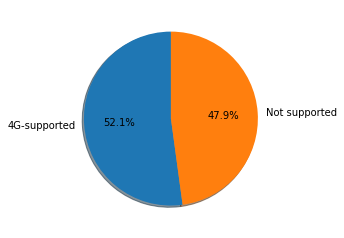

In [20]:
labels4g = ["4G-supported",'Not supported']
values4g = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##### Here,in the piechart we observe:

- 52.1% phones support 4-G Network
- 47.9% phones does not support 4-G Network

##### Supports Dual sim (or) not

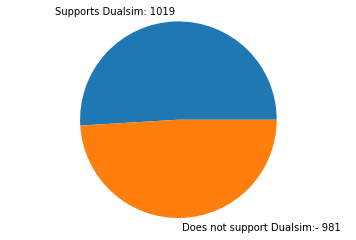

In [21]:
x=df_train['dual_sim'].value_counts()
labels='Supports Dualsim: '+str(x[1]),'Does not support Dualsim:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')
plt.show()

###### Observations:-

- 1019 mobile phones are Dualsim Enabled
- 981 phones does not support Dualsim feature

###### Touch screen vs Price_range

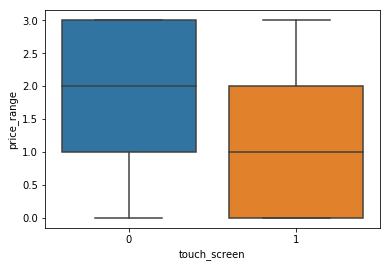

In [22]:
sns.boxplot(x='touch_screen',y='price_range',data=df_train)
plt.show()

##### Observations:-

- Touch screen phones are more costlier than the other phones

###### Battery power vs Price Range

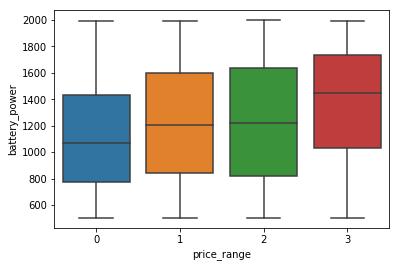

In [26]:
sns.boxplot(x="price_range", y="battery_power", data=df_train)

###### In box plot we observe that:

- when price_range is 3 then battery power greater than 1600 MAH
- when price_range is 2 then battery power greater is 1600 MAH
- when price_range is 1 then battery power is 1500 MAH
- when price_range is 0 then battery power is 1400 MAH

##### Number of Phones vs Camera megapixels of front and primary camera :

Text(0.5, 0, 'MegaPixels')

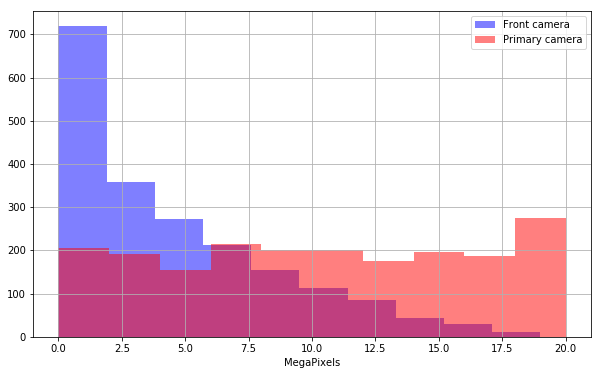

In [27]:
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

##### EDA observation:

- ram has direct impact on the price range of the phones
- Features like 1.Dual sim
    2.wifi

    3.4g

    4.3g

    5.Touch screen

     - these have more impact on the phones prices

##### 3. Train and test the model:

- After completion of preprocessing steps, the data splits into training and testing datasets to train the classifier and check its accuracy. We will be using one or more classification algorithms. We use algorithms like Decision Trees, Logistic regression, Linear regression,Random forest.

In [29]:
y = df_train['price_range']
X = df_train.drop('price_range', axis = 1)

In [30]:
y.unique() # We have four price ranges as target values

array([1, 2, 3, 0], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 101)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler().fit(X_train)

C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [35]:
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_train

C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.984823,-0.986343,0.345546,0.990050,-0.066906,-1.053953,-1.156036,0.653456,-0.451426,0.646912,-0.312840,-0.841894,0.512558,1.507969,0.645076,0.043393,0.176984,0.563877,-0.998751,-1.012579
1,-0.673224,1.013846,-1.250227,-1.010051,-0.766578,0.948808,1.044235,-1.416900,0.114337,-1.102237,0.849672,-1.018037,-0.852864,0.724930,1.120599,-1.094793,-0.937146,0.563877,1.001251,0.987577
2,-0.400668,1.013846,0.222795,0.990050,-0.999802,-1.053953,1.429282,-0.036663,-0.140256,1.084199,-1.641426,-1.275477,-1.329604,-1.295786,-0.068208,0.726305,0.919738,-1.773437,1.001251,-1.012579
3,1.545834,-0.986343,-1.250227,-1.010051,-0.300130,0.948808,1.704316,-0.726781,-0.819173,-1.102237,0.019306,-1.178372,-1.318033,1.189631,0.169554,-0.639519,1.476803,0.563877,-0.998751,-1.012579
4,-1.359156,-0.986343,-1.250227,-1.010051,-0.766578,-1.053953,0.494167,1.688634,1.613611,1.084199,0.019306,-0.715433,-1.563346,0.767924,-0.068208,0.726305,-1.308523,0.563877,1.001251,0.987577
5,-0.350700,1.013846,-0.759220,0.990050,1.798886,0.948808,-1.651097,0.653456,0.142626,0.209625,0.849672,-0.017635,0.008046,0.587715,0.169554,1.409217,-0.194393,0.563877,-0.998751,0.987577
6,-0.228050,-0.986343,-0.390965,0.990050,-0.766578,0.948808,-0.550961,1.688634,-0.423138,-0.664950,-0.644987,1.066321,1.084184,-0.831085,-0.068208,-0.184244,0.919738,0.563877,1.001251,-1.012579
7,0.501037,1.013846,-1.250227,0.990050,1.565662,-1.053953,-1.101029,1.343574,-0.649444,-1.102237,0.683599,0.474662,-0.202553,1.650672,-1.732537,-0.639519,0.734049,-1.773437,1.001251,0.987577
8,0.105831,-0.986343,-1.250227,-1.010051,-0.999802,-1.053953,-1.596090,-1.416900,0.086049,0.646912,-0.977133,-0.098932,-0.339095,-0.831085,-0.781492,0.498668,0.734049,-1.773437,1.001251,0.987577
9,-1.545402,1.013846,-1.250227,0.990050,-0.533354,0.948808,0.494167,1.343574,0.142626,0.209625,-0.644987,1.398283,1.065670,0.439523,-0.305969,-0.867156,-0.380081,0.563877,1.001251,-1.012579


In [36]:
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test))
scaled_X_test

C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.342699,-1.005013,-1.264622,-1.056599,1.232482,0.995012,0.546668,-0.952194,-1.418952,-1.537778,1.599113,0.574258,-0.719246,-0.515779,-0.090880,-1.333665,0.543941,0.542677,-1.035635,-1.020204
1,-1.402675,-1.005013,-1.264622,-1.056599,-0.308120,-1.005013,-0.342901,-0.594562,-1.362658,-0.227172,-0.971679,0.643609,1.650558,-0.252633,-0.326931,1.048943,0.543941,0.542677,0.965592,0.980196
2,-1.455565,-1.005013,-0.167336,0.946433,1.232482,0.995012,-1.343667,0.120701,0.016536,1.520303,0.635066,-1.195289,-1.476749,0.998267,-0.799034,0.334161,-0.150636,0.542677,-1.035635,0.980196
3,-0.089620,0.995012,-0.411177,-1.056599,0.132052,0.995012,0.991453,1.908858,0.072830,-0.227172,1.599113,0.614526,0.038257,-0.635912,-1.271137,-0.618882,1.585806,0.542677,0.965592,0.980196
4,-0.742698,-1.005013,-0.655019,0.946433,-0.308120,0.995012,-1.566059,-0.594562,-0.856015,-1.537778,-0.971679,1.630171,0.540943,-1.021097,-0.090880,1.048943,-1.192502,0.542677,0.965592,0.980196
5,0.519766,0.995012,1.051870,0.946433,0.572224,0.995012,-0.676490,-0.236931,0.889088,1.083434,0.795740,1.393038,0.253694,-0.657841,-1.271137,-0.380622,0.370296,0.542677,0.965592,0.980196
6,-0.735799,0.995012,1.417632,-1.056599,-0.308120,0.995012,1.158247,-0.594562,1.423878,-0.227172,0.153042,-0.020811,0.932436,0.704611,1.561481,2.478508,-0.150636,0.542677,-1.035635,0.980196
7,-0.131012,-1.005013,0.564188,-1.056599,-0.968379,0.995012,1.325041,0.835963,-0.771575,1.083434,-1.453702,-1.329515,-0.552456,-0.456667,-1.743240,-1.333665,1.585806,0.542677,-1.035635,-1.020204
8,1.731640,-1.005013,1.661473,-1.056599,1.012396,-1.005013,-1.010078,-0.236931,1.536465,1.083434,1.277764,-0.799322,-0.656700,-0.777019,-1.035086,-1.095404,-0.497925,0.542677,0.965592,-1.020204
9,-0.197700,-1.005013,-0.167336,-1.056599,-0.308120,-1.005013,0.546668,-1.309825,1.620906,0.209697,0.313717,0.178291,0.712366,-0.642586,1.325429,1.525465,1.585806,0.542677,-1.035635,0.980196


##### Testing and Training scaled logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr1 = LogisticRegression(multi_class = 'ovr', solver = 'sag',  max_iter = 10000)

In [39]:
lr1.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
y_train_pred_lr = lr1.predict(scaled_X_train)

In [41]:
y_train_pred_lr

array([3, 2, 0, ..., 0, 3, 0], dtype=int64)

In [42]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred_lr) #train
confusion_matrix

array([[406,   0,   0,   0],
       [ 29, 297,  72,   0],
       [  0,  78, 272,  30],
       [  0,   0,   1, 415]], dtype=int64)

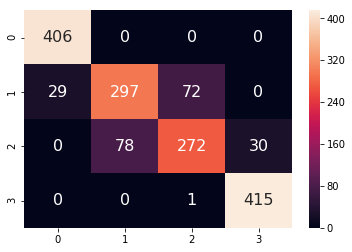

In [43]:
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size": 16}, fmt='g') #train

In [44]:
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       406
           1       0.79      0.75      0.77       398
           2       0.79      0.72      0.75       380
           3       0.93      1.00      0.96       416

   micro avg       0.87      0.87      0.87      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.87      0.86      1600



In [45]:
y_test_pred_lr = lr1.predict(scaled_X_test)

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred_lr)
confusion_matrix

array([[93,  1,  0,  0],
       [10, 71, 21,  0],
       [ 0, 22, 82, 16],
       [ 0,  0,  0, 84]], dtype=int64)

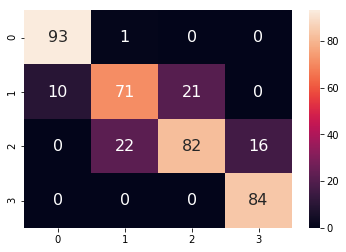

In [47]:
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size": 16}, fmt='g') #test

In [48]:
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        94
           1       0.76      0.70      0.72       102
           2       0.80      0.68      0.74       120
           3       0.84      1.00      0.91        84

   micro avg       0.82      0.82      0.82       400
   macro avg       0.82      0.84      0.83       400
weighted avg       0.82      0.82      0.82       400



In [49]:
acc_lr = metrics.accuracy_score(y_train, y_train_pred_lr) #train
acc_lr

0.86875

In [50]:
acc_lr = metrics.accuracy_score(y_test, y_test_pred_lr) #test
acc_lr

0.825

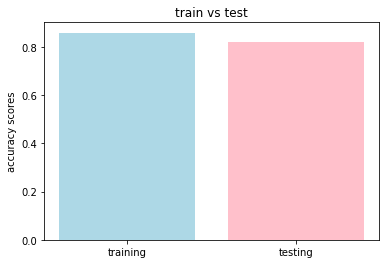

In [51]:
models = ['training','testing']
acc_scores = [0.86,0.82]
plt.bar(models, acc_scores, color=['lightblue', 'pink' ])
plt.ylabel("accuracy scores")
plt.title("train vs test")
plt.show()

###### Here, training accuracy is 86% testing accuracy is 82%

###### Testing and training logistic regresssion without scaling

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression(multi_class = 'ovr', solver = 'sag',  max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred_lr_11 = lr.predict(X_test)

In [55]:
y_pred_lr_12 = lr.predict(X_train)

In [56]:
#test
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr_11)
confusion_matrix

array([[82, 11,  1,  0],
       [25, 49, 23,  5],
       [ 0, 21, 54, 45],
       [ 0,  4,  8, 72]], dtype=int64)

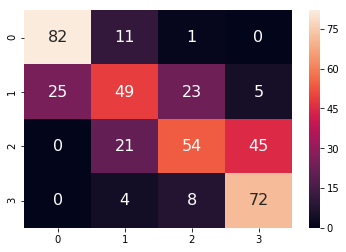

In [57]:
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size": 16}, fmt='g') #test

In [58]:
#train
confusion_matrix_1 = metrics.confusion_matrix(y_train, y_pred_lr_12)
confusion_matrix_1

array([[373,  27,   6,   0],
       [ 78, 217,  80,  23],
       [  2,  81, 138, 159],
       [  0,   3,  31, 382]], dtype=int64)

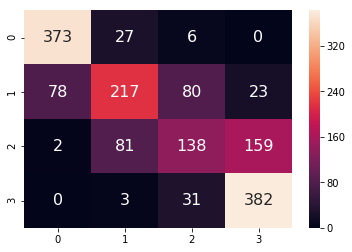

In [59]:
sns.heatmap(confusion_matrix_1,annot=True,annot_kws={"size": 16}, fmt='g') #train

In [60]:
print(classification_report(y_test, y_pred_lr_11)) #test

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        94
           1       0.58      0.48      0.52       102
           2       0.63      0.45      0.52       120
           3       0.59      0.86      0.70        84

   micro avg       0.64      0.64      0.64       400
   macro avg       0.64      0.66      0.64       400
weighted avg       0.64      0.64      0.63       400



In [61]:
print(classification_report(y_train, y_pred_lr_12)) #train

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       406
           1       0.66      0.55      0.60       398
           2       0.54      0.36      0.43       380
           3       0.68      0.92      0.78       416

   micro avg       0.69      0.69      0.69      1600
   macro avg       0.68      0.69      0.67      1600
weighted avg       0.68      0.69      0.67      1600



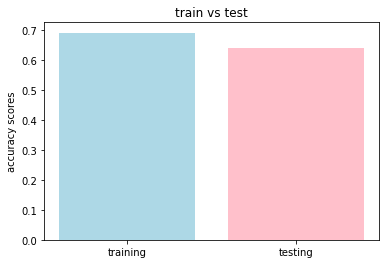

In [62]:
models = ['training','testing']
acc_scores = [0.69,0.64]
plt.bar(models, acc_scores, color=['lightblue', 'pink' ])
plt.ylabel("accuracy scores")
plt.title("train vs test")
plt.show()

- Here, Training accuracy in model is 69%
- Here, Testing accuracy in model is 64%


##### Training and testing using Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt = DecisionTreeClassifier(random_state=101,criterion='entropy')
dt_model = dt.fit(X_train, y_train)

In [65]:
y_train_pred_dt=dt.predict(X_train)

In [66]:
con_train_dt=metrics.confusion_matrix(y_train,y_train_pred_dt)
con_train_dt

array([[406,   0,   0,   0],
       [  0, 398,   0,   0],
       [  0,   0, 380,   0],
       [  0,   0,   0, 416]], dtype=int64)

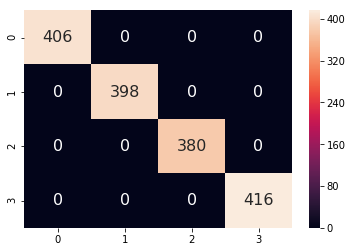

In [67]:
sns.heatmap(con_train_dt,annot=True,annot_kws={"size": 16}, fmt='g') #train

In [68]:
print(classification_report(y_train,y_train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       398
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       416

   micro avg       1.00      1.00      1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [69]:
accuracy_score(y_train,y_train_pred_dt) #train

1.0

In [70]:
y_pred_dt = dt.predict(X_test)

In [71]:
con_test_dt=metrics.confusion_matrix(y_test, y_pred_dt)
con_test_dt

array([[ 86,   8,   0,   0],
       [  7,  84,  11,   0],
       [  0,  10, 100,  10],
       [  0,   0,   6,  78]], dtype=int64)

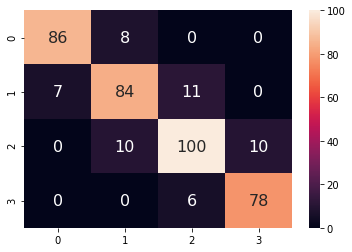

In [72]:
sns.heatmap(con_test_dt,annot=True,annot_kws={"size": 16}, fmt='g')

In [73]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        94
           1       0.82      0.82      0.82       102
           2       0.85      0.83      0.84       120
           3       0.89      0.93      0.91        84

   micro avg       0.87      0.87      0.87       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.87      0.87      0.87       400



In [74]:
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
acc_dt #test

0.87

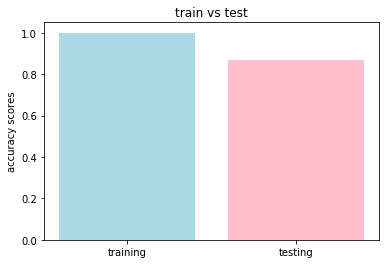

In [75]:
models = ['training','testing']
acc_scores = [1,0.87]
plt.bar(models, acc_scores, color=['lightblue', 'pink' ])
plt.ylabel("accuracy scores")
plt.title("train vs test")
plt.show()

- Here, Training accuracy in decision tree model is 100%

- Here, Testing accuracy in decision tree model is 87%

###### Tree Visiualization:

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt)
plt.show()

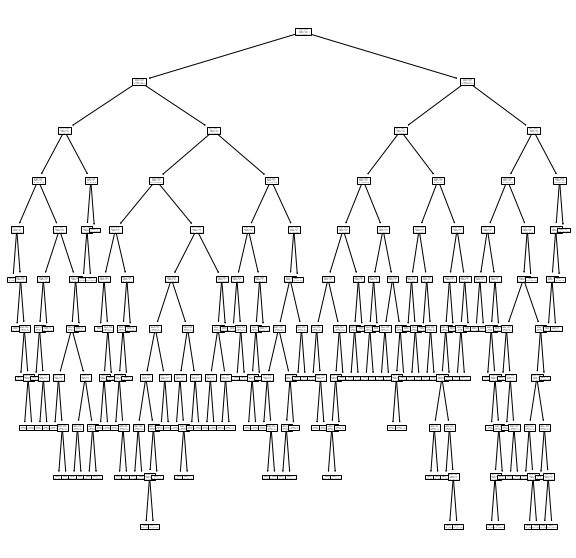

###### GridSearch Cv to increase accuracy of testing in decision tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
grid_params={
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth': range(1,11,2),
    'min_samples_leaf':range(1,6,3)
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dt,param_grid=grid_params)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M V R NAIDU\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [79]:
#Building the model with these params
final_model=DecisionTreeClassifier(criterion='entropy',
                                   max_depth=9,
                                   min_samples_leaf=6,
                                   splitter='best')
final_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
#prediction on test data
pred_test = final_model.predict(X_test)

#classification report of actual values and predicted values(gridsearch)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        94
           1       0.78      0.88      0.83       102
           2       0.91      0.76      0.83       120
           3       0.90      0.94      0.92        84

   micro avg       0.87      0.87      0.87       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.87      0.87      0.87       400



In [81]:
acc_dt = metrics.accuracy_score(y_test, pred_test)
acc_dt #test

0.87

###### In grid based Cv Accuracy of decision tree is

- Here, Testing accuracy in decision tree model is 87%


##### Testing and training using Random Forest :

In [82]:
#Import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier

# initialize the object for RFC
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(X_train, y_train)

In [83]:
y_pred_train_1113 = rf.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_pred_train_1113))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       398
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       416

   micro avg       1.00      1.00      1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [84]:
# Prediction on test data(unseen data)
y_pred_rf = rf.predict(X_test)
clas_test_rf=metrics.confusion_matrix(y_test, y_pred_rf)
clas_test_rf

array([[ 87,   7,   0,   0],
       [  7,  85,  10,   0],
       [  0,  14, 100,   6],
       [  0,   0,   3,  81]], dtype=int64)

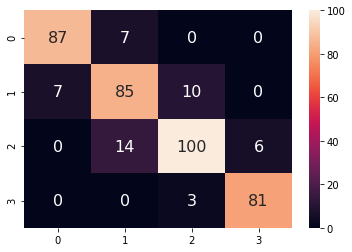

In [85]:
sns.heatmap(clas_test_rf,annot=True,annot_kws={"size": 16}, fmt='g')

In [86]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        94
           1       0.80      0.83      0.82       102
           2       0.88      0.83      0.86       120
           3       0.93      0.96      0.95        84

   micro avg       0.88      0.88      0.88       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.88      0.88      0.88       400



In [87]:
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
acc_rf

0.8825

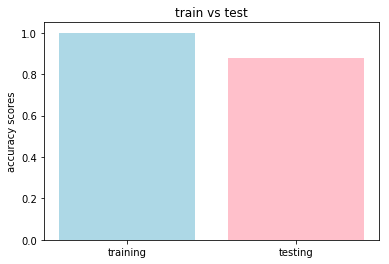

In [88]:
models = ['training','testing']
acc_scores = [1,0.88]
plt.bar(models, acc_scores, color=['lightblue', 'pink' ])
plt.ylabel("accuracy scores")
plt.title("train vs test")
plt.show()

###### Here, in Random Forest training data accuracy is 100% testing data accuracy is 88.25%

#### Best among scaled Logistic regression,logistic regression,decision tree,Random Forest

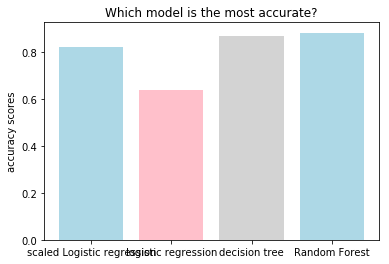

In [89]:
models = ['scaled Logistic regression','logistic regression', 'decision tree','Random Forest']
acc_scores = [0.82, 0.64, 0.87,0.882]
plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

##### Random forest shows best Accuracy among models so we choose Random forest for testing.

##### Making predictions on Training dataset:

In [90]:
df_test=pd.read_csv('https://raw.githubusercontent.com/abhi230699/AI-ML_project/master/test%5B1%5D.csv')

In [91]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [92]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same.
df_test=df_test.drop('id',axis=1)

In [93]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [94]:
predicted_price_range = rf.predict(df_test)

In [95]:
predicted_price_range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 1, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

In [96]:
df_test['price_range'] = predicted_price_range #new column price range is added

In [97]:
df_test.head() #new column price range is added

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [98]:
df_train['price_range']

0       1
1       2
2       2
3       2
4       1
5       1
6       3
7       0
8       0
9       0
10      3
11      3
12      1
13      2
14      0
15      0
16      3
17      3
18      1
19      1
20      3
21      3
22      1
23      0
24      1
25      2
26      3
27      3
28      2
29      0
       ..
1970    2
1971    1
1972    0
1973    3
1974    1
1975    3
1976    0
1977    2
1978    1
1979    1
1980    1
1981    1
1982    2
1983    2
1984    1
1985    3
1986    1
1987    0
1988    1
1989    1
1990    0
1991    3
1992    0
1993    3
1994    3
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

##### New predicted column is added price_range in test dataset according to features price range varies from 0,1,2,3

##### Here, is a example of battery power vs price range of test dataset

In [99]:
pd.DataFrame({'batterypower' : df_test['battery_power'],'price_range' : predicted_price_range})

,batterypower,price_range
0,1043,3
1,841,3
2,1807,2
3,1546,3
4,1434,1
5,1464,3
6,1718,3
7,833,1
8,1111,3
9,1520,0


- If battery power is 1043 then price range is classified has 3
- It is similar to train dataset


### Conclusion

   - so, Bob has classified price range for mobile indicating how high the price is and starts opening his new shop.